# Ejemplo para el calculo de costes de construccion en el alcance de estudios previos

## NOTA IMPORTANTE PARA LA EJECUCIÓN DE LOS EJEMPLOS
La carpeta nb contiene los ficheros notebooks con diferentes ejemplos de aplicación de la ROM 1.1, así como dos ficheros de configuración **``environment.py``** y **``modules_path.py``**. El fichero **``modules_path.py``** debe ser abierto por cada usuario mediante un editor de texto cualquiera para modificar la ruta a la carpera en la que se encuentren los códigos de los módulos de la ROM en nuestro ordenador.

A continuación se muestra un ejemplo:
> Mac/Linux:
> 
> ```
> modules_path = '/Users/user/Development/ROM_1_1/src'
> ```
> 
> Windows (es importante separar cada carpeta mediante doble barra):
> 
> ```
> modules_path = 'C:\\Development\\ROM_1_1\\src'

## Importación de paquetes de IPython

In [1]:
# hidden
import environment as env
env.initialize()

In [2]:
# Python 2/3 setup 
from __future__ import (absolute_import, division, print_function, unicode_literals)
# from builtins import *

In [3]:
# Juypyter setup

%matplotlib inline
import os
import sys
from IPython.display import HTML

In [4]:
sys.path

['',
 'D:\\REPOSITORIO GIT\\clima_maritimo',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\python27.zip',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\DLLs',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\plat-win',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\lib-tk',
 'C:\\Users\\GDFA-JUAN\\Anaconda2',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages\\Babel-2.5.0-py2.7.egg',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages\\win32',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\GDFA-JUAN\\Anaconda2\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\GDFA-JUAN\\.ipython',
 'D:\\REPOSITORIO GIT\\modelo_construccion_2018\\construccion']

## Importación de paquetes para el ejemplo

In [5]:
import logging
import os

from construccion.simulacion_estudio_previo import simulacion_estudio_previo
from construccion.utils_notebook import lectura_fichero_entrada

## Datos de entrada

### RUTA DE DIRECTORIOS DE DATOS DE ENTRADA Y SALIDA

In [6]:
# Ruta con los datos de entrada
ruta_de = os.path.join(env.input_path, 'construccion', 'estudios_previos')
# Ruta con los datos de salida
ruta_ds = os.path.join(env.output_path, 'construccion', 'estudios_previos')

alcance = 'EP'

### INTRODUCCIÓN

De acuerdo con el documento del articulado de la ROM 1.1., en el alcance de estudio previos se debe realizar una descripción preliminar del proceso constructivo, los medios necesarios y la disponibilidad de materiales. En lo relativo al cálculo de costes se deben evaluar al menos, los costes de construcción en función de la tipología y dimensiones principales de la alineación principal. Según el articulado, los costes totales del dique se podrán obtener de manera simplificada para este alcance mayorando los costes de inversión inicial por dos coeficientes: uno para ponderar la rigurosidad del clima y otro coeficiente mayor que la unidadad para incluir los costes de reparación, desmantelamiento, etc.

En este ejemplo se presenta el cálculo de los costes de construcción y su ponderación para la consideración de los costes totales únicamente para la alineación principal de una tipología de dique. Para el cálculo de costes en el resto de tipologías y de tramos se deberá proceder del mismo modo.

### DEFINICIÓN DE LA TIPOLOGÍA Y FORMA EN PLANTA

En este ejemplo se propone analizar el coste de un dique de tipo mixto con berma baja de protección (Tipo C, LMB). La sección tipo del dique a analizar se muestra en la figura. En este ejemplo, se considera para la forma en planta un dique compuesto por una única alineación principal de 1000 m de longitud. El calado de la alineación principal es de 16 m respecto al nivel medio del mar, la altura de la berma es de 4 m y los cajones tienen una altura de 18 m por 12 m de ancho.

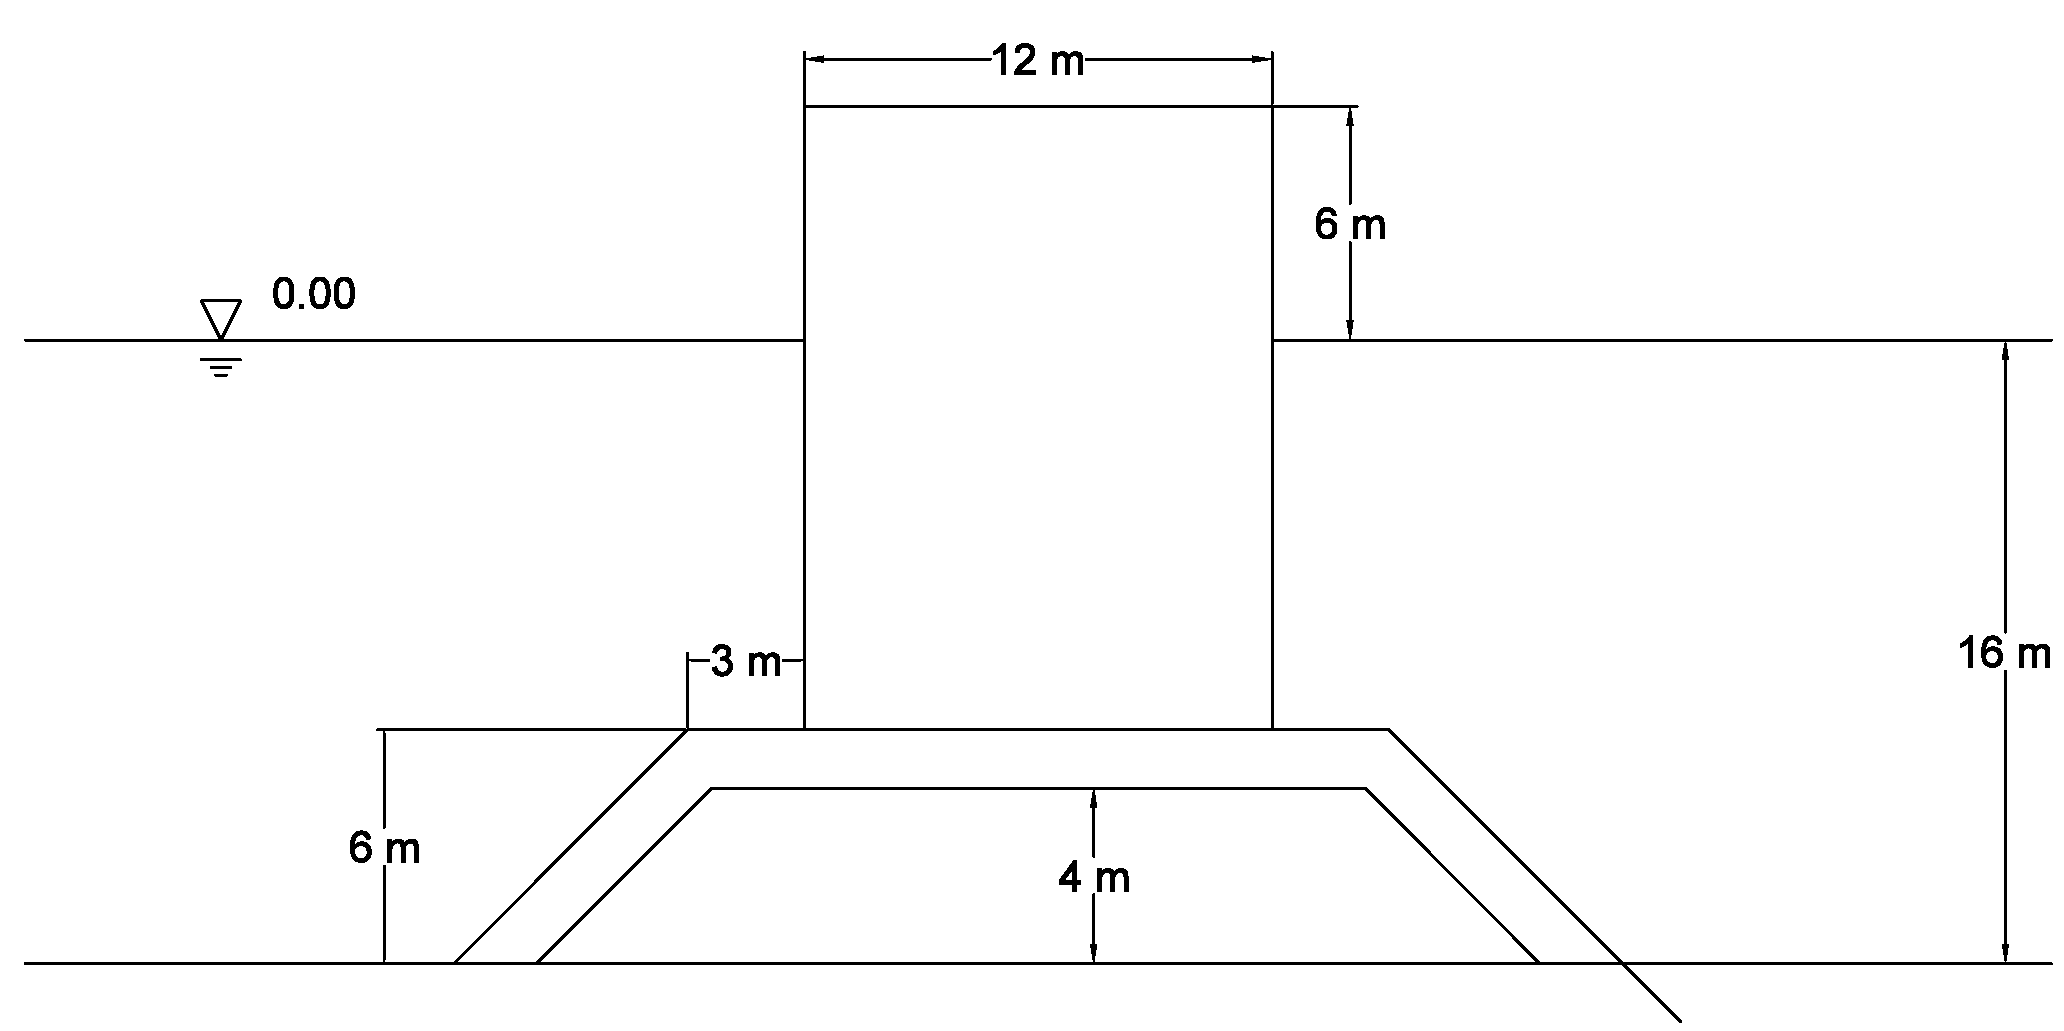

In [7]:
from IPython.display import Image
img_name = os.path.join(ruta_de, 'imagenes', 'esquema_dique_c.png')
Image(filename=img_name, width=800)

#### Fichero con los datos de entrada de tipología y forma en planta
(Para modificar los datos utilizados en el ejemplo se deben modificar los ficheros de la carpeta de inputs)

In [8]:
r_de = os.path.join(ruta_de, 'planta', 'datos_entrada_planta.txt')
content = lectura_fichero_entrada(r_de, 2)
HTML(content)

### BASE DE DATOS DE PRECIOS DE UNIDADES DE OBRA EMPLEADAS EN CONSTRUCCIÓN

Para el alcance de Estudios Previos, el calculo de los costes de construccion de la alineación principal del dique se realiza a partir de la base de datos contenida en el documento Bases de datos extraída a partir de El Observatorio de Obras Portuarias de Puertos del Estado con fecha de 2013. La utilidad de esta base de datos estriba en posibilitar la estimación del coste de una obra marítima a efectos de su planificación inversora de una forma simple. Este observatorio se compone de la siguiente base de datos: una base de datos de los precios unitarios de las unidades de obra más habituales en obras marítimas obtenidos a partir de proyectos redactados entre 2006 y 2013.

### DESCRIPCIÓN DEL PROCESO CONSTRUCTIVO. UNIDADES DE OBRA Y MEDICIONES

Para la alineación principal del dique es necesario definir de forma preliminar la descripción del proceso constructivo a través de: (i) las unidades de obra a emplear durante la construcción
del dique y (ii) las áreas equivalentes de las distintas partes del dique para la obtención de las mediciones de cada unidad de obra.

Se enumeran a continuación las unidades de obra, su descripción, área equivalente, medición y unidades a emplear en la construcción de la alineación principal del dique:
* **Dragado**
    * 01-001: Dragado general en terreno suelto, carga, transporte y vertido. Medición a emplear 189000 $\mathrm{m^3}$.
* **Cimentación y berma baja de protección**
	* 03-004: Todo uno de cantera, colocado en formación de núcleo de banqueta de cimentación, medido en báscula y ejecutado por medios marítimos. Área equivalente: 81.6 $\mathrm{m^2}$. Medición:         81600 $\mathrm{m^3}$.
	* 02-007: Escollera clasificada de peso entre 1000-2000	kg, suministro, transporte y colocación en manto y/o filtros por medios marítimos o terrestres. Área equivalente: 80.4 $\mathrm{m^2}$.          Medición: 80400 $\mathrm{m^3}$.
	* 06-001: Enrase con grava en banqueta de cimentación de cajones o muros de muelle por medios marítimos. Medición 25600 $\mathrm{m^3}$
* **Cajones**
	* 17-001: Botadura, transporte y fondeo de cajones,	incluso fondeos intermedios provisionales. Medición 40 cajones de 25 m de eslora
	* 04-006: Relleno granular en celdas de cajones, incluso
	suministros, transporte y vertido, totalmente
	acabado procedente de dragado. Medición: 233000 $\mathrm{m^3}$
	* 04-007: Relleno granular en celdas de cajones, incluso
	suministros, transporte y vertido, totalmente
	acabado de procedencia terrestre. Medición: 233000 $\mathrm{m^3}$
* **Superestructura**
	* 04-005: Relleno seleccionado en coronación de cajones, extendido y compactado de procedencia terrestre. Medición: 11250 $\mathrm{m^3}$
	* 13-002: Hormigón para armar HA-35 colocado en
	cajones, incluso encofrado, desencofrado,
	vibrado y curado. Medición: 83350 $\mathrm{m^3}$
	* 13-004: Hormigón para armar HA-30 colocado en
	superestructura, incluso encofrado,
	desencofrado, vibrado y curado. Medición: 4000 $\mathrm{m^3}$
	* 13-006: Hormigón para armar HA-30 colocado en
	alzados o espaldones, incluso encofrado,
	desencofrado, vibrado y curado.Medición: 39000 $\mathrm{m^3}$
	* 16-002: Aceros en redondos B500S para armado de
	cajones de hormigón, incluso cortado, doblado,
	p.p. de recortes y ataduras. Medición: 8335000 $\mathrm{kg}$
	* 16-003: Aceros en redondos B500S para armado en
	superestructura, incluso cortado, doblado, p.p.
	de recortes y ataduras. Medición: 360000 $\mathrm{kg}$

#### Fichero con los datos de entrada de la descripción del proceso constructivo. Unidades de obra y mediciones
(Para modificar los datos utilizados en el ejemplo se deben modificar los ficheros de la carpeta de datos de entrada)

In [9]:
r_de = os.path.join(ruta_de, 'tramos', 'T_0', 'unidades_obra', 'unidades_obra.txt')
content = lectura_fichero_entrada(r_de, 20)
HTML(content)

### COEFICIENTES DE MAYORACION DE CLIMA Y COSTES TOTALES

Para el calculo de los costes totales de la alineación principal del dique en el alcance de estudios previos se consideran dos coeficientes para la mayoración de los costes de construcción obtenidos: 
* Coeficiente de mayoración en función de la rigurosidad del clima en la zona.
* Coeficiente de mayoración de los costes de construcción a fin de incluir de forma preliminar el resto de costes (reparación, desmantelamiento, etc.).

En este ejemplo se considera un coeficiente de mayoración por el clima de 1.4 y un coeficiente de mayoración para la obtención del coste total de 1.6.

#### Fichero con los datos de entrada de los coeficientes de mayoración
(Para modificar los datos utilizados en el ejemplo se deben modificar los ficheros de la carpeta de datos de entrada)

In [10]:
r_de = os.path.join(ruta_de, 'coeficientes', 'coeficientes.txt')
content = lectura_fichero_entrada(r_de, 2)
HTML(content)

## Cálculo del coste preliminar de construcción de la alineación principal (Estudios Previos)

Para la obtención del coste preliminar de construcción de la alineación principal del dique, la herramienta obtiene los costes por unidad de medición de la base de datos de construcción y multiplica el coste por unidad de medición de las unidades de obra seleccionadas por la medición introducida. 

In [11]:
(datos_salida) = simulacion_estudio_previo(ruta_de, alcance, ruta_ds)

## Datos de salida

In [12]:
r_ds = os.path.join(ruta_ds, 'Coste_total_dique.html')
HTML(filename=r_ds)